In [2]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import signal

# **1. Работа с данными**

# Анализ данных

Обучение и тестирование модели будет производиться на датасете "CODE-15%: a large scale annotated dataset of 12-lead ECGs". Датасет был специально создан для обучения и тестирования моделей ML, поэтому данные не требуют дополнительной обработки. Датасет содержит записи экг, записанные с частотой 400 Гц длительностью 10 секунд в 12-ти отведениях, а также информацию о пациенте: id исследовния, возраст, пол, имеется ли: "1dAVb"(АВ-блокада 1-й степени) \ "RBBB"(блокада правой ветви пучка гиса) \ "LBBB" (блокада левой ветви пучка гиса) \ "SB" (синусовая брадикардия) \
"AF" (есть ли у пациента фибрилляция предсердий или нет) \
"ST" (есть ли у пациента синусовая тахикардия или нет); id пациента, нормальная ли ЭКГ, умер ли пациент и время смерти, если да. Данные представлены в виде таблицы в формате .csv. На часть из них можно посмотреть ниже.

**Данные о пациентах**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Сигналы ЭКГ**

Записи экг предсттавлены в виде 3-ёх мерного тензора (N, 4096, 12), где N - это количество исследований, 4096 - количество записанных сигналов, 12 - количество отведений.

Загружаем записи экг.

In [ ]:
train_data = np.load('/content/drive/MyDrive/train_data.npy')
train_results = np.load('/content/drive/MyDrive/train_results.npy')

In [ ]:
data0 = np.load('/content/drive/MyDrive/data0.npy')
result0 = np.load('/content/drive/MyDrive/results0.npy')

data1 = np.load('/content/drive/MyDrive/data1.npy')
result1 = np.load('/content/drive/MyDrive/results1.npy')

data2 = np.load('/content/drive/MyDrive/data2.npy')
result2 = np.load('/content/drive/MyDrive/results2.npy')

data3 = np.load('/content/drive/MyDrive/data3.npy')
result3 = np.load('/content/drive/MyDrive/results3.npy')

data4 = np.load('/content/drive/MyDrive/data4.npy')
result4 = np.load('/content/drive/MyDrive/results4.npy')

data5 = np.load('/content/drive/MyDrive/data5.npy')
result5 = np.load('/content/drive/MyDrive/results5.npy')

data6 = np.load('/content/drive/MyDrive/data6.npy')
result6 = np.load('/content/drive/MyDrive/results6.npy')

data7 = np.load('/content/drive/MyDrive/data7.npy')
result7 = np.load('/content/drive/MyDrive/results7.npy')

data8 = np.load('/content/drive/MyDrive/data8.npy')
result8 = np.load('/content/drive/MyDrive/results8.npy')

data9 = np.load('/content/drive/MyDrive/data9.npy')
result9 = np.load('/content/drive/MyDrive/results9.npy')

In [ ]:
all_data = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]
all_results = [result0, result1, result2, result3, result4, result5, result6, result7, result8, result9]

Каждая папка содержит 2 массива: 1) id исследований (для связи с пациентом); 2) тензор самих сигналов (N, 4096, 12).

In [ ]:
exam_id0 = np.array(signals_folder0['exam_id'])
exam_id0 = exam_id0[0:20000]
print("Количество исследований в папке №0:", exam_id0.shape)

exam_id1 = np.array(signals_folder1['exam_id'])
exam_id1 = exam_id1[0:20000]
print("Количество исследований в папке №1:", exam_id1.shape)

exam_id2 = np.array(signals_folder2['exam_id'])
exam_id2 = exam_id2[0:20000]
print("Количество исследований в папке №2:", exam_id2.shape)

exam_id3 = np.array(signals_folder3['exam_id'])
exam_id3 = exam_id3[0:20000]
print("Количество исследований в папке №3:",exam_id3.shape)

exam_id4 = np.array(signals_folder4['exam_id'])
exam_id4 = exam_id4[0:20000]
print("Количество исследований в папке №4:",exam_id4.shape)

exam_id5 = np.array(signals_folder5['exam_id'])
exam_id5 = exam_id5[0:20000]
print("Количество исследований в папке №5:",exam_id5.shape)

print("№0:", exam_id0)
print("№1:", exam_id1)
print("№2:", exam_id2)
print("№3:", exam_id3)
print("№4:", exam_id4)
print("№5:", exam_id5)

Количество исследований в папке №0: (20000,)
Количество исследований в папке №1: (20000,)
Количество исследований в папке №2: (20000,)
Количество исследований в папке №3: (20000,)
Количество исследований в папке №4: (20000,)
Количество исследований в папке №5: (20000,)
№0: [ 590673  214626 2936711 ... 1444004 2659750  536312]
№1: [4409337  835969 2540049 ...  523675  880632 2872039]
№2: [  18903 2902407 4274913 ... 2866962 2661384 1179015]
№3: [3190119  683626 2767061 ...  220811 2795569 1450162]
№4: [ 920511  379941 3053027 ...  891207 3048377 1778106]
№5: [2771471  927961 3112827 ... 1231970 1600485 1679281]


Для исследования будем использовать 100000 записей. Сопоставим каждому исследованию вектор размерности 6 из 0 и 1. 1 означает, что данная болезнь есть у пациента, a 0 - нет.  

In [ ]:
exam_id = np.hstack([exam_id0, exam_id1, exam_id2, exam_id3, exam_id4, exam_id5])
print(exam_id.shape)
print(exam_id)

(120000,)
[ 590673  214626 2936711 ... 1231970 1600485 1679281]


Каждому исследованию сопоставим его порядковый номер

In [ ]:
id_dict = {}
for i in range (0,345779):
  id_dict[information.exam_id[i]] = i


Сопоставим каждому исследованию вектор размерности 6 из 0 и 1. 1 означает, что данная болезнь есть у пациента, a 0 - нет.

In [ ]:
results = np.eye(120000, 6)

for i in range(0,120000):
  ind = id_dict[exam_id[i]]

  if information['1dAVb'][ind]:
    results[i][0] = 1
  else:
    results[i][0] = 0

  if information['RBBB'][ind]:
    results[i][1] = 1
  else:
    results[i][1] = 0

  if information['LBBB'][ind]:
    results[i][2] = 1
  else:
    results[i][2] = 0

  if information['SB'][ind]:
    results[i][3] = 1
  else:
    results[i][3] = 0

  if information['ST'][ind]:
    results[i][4] = 1
  else:
    results[i][4] = 0

  if information['AF'][ind]:
    results[i][5] = 1
  else:
    results[i][5] = 0

print(results[20000:20020,:])

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Теперь работаем с сигналами экг. Датасет содержит 10 секундные и 7 секундные записи. Если запись имеет длительность 7 секунд, то она дополнена в начале и в конце 648 нулями. Возьмём от всех записей средние 7 секунд, т.е. от 648 до 3448 сигнала.

In [ ]:
loaded_data = np.load('/content/drive/MyDrive/data0.npy')

In [ ]:
def spectrogram_dataset(dataset, results):
  spec_signals = []
  spec_results = []
  count = 0
  for i in range (0, results.shape[0]):
    if sum(results[i]) == 0 and count < 3000:
      count+=1
      mas = []
      for lead in range (0,12):
        mas.append(np.array(dataset[i,:,lead]))
      mas1 = np.concatenate([mas[0][..., np.newaxis],mas[1][..., np.newaxis],mas[2][..., np.newaxis]
                           ,mas[3][..., np.newaxis],mas[4][..., np.newaxis],mas[5][..., np.newaxis],mas[6][..., np.newaxis],
                           mas[7][..., np.newaxis],mas[8][..., np.newaxis],mas[9][..., np.newaxis],mas[10][..., np.newaxis],
                           mas[11][..., np.newaxis]], axis = -1)
      spec_signals.append(mas1)
      spec_results.append(results[i])

    if sum(results[i]) > 0 and count:
      mas = []
      for lead in range (0,12):
        mas.append(np.array(dataset[i,:,lead]))

      mas1 = np.concatenate([mas[0][..., np.newaxis],mas[1][..., np.newaxis],mas[2][..., np.newaxis]
                           ,mas[3][..., np.newaxis],mas[4][..., np.newaxis],mas[5][..., np.newaxis],mas[6][..., np.newaxis],
                           mas[7][..., np.newaxis],mas[8][..., np.newaxis],mas[9][..., np.newaxis],mas[10][..., np.newaxis],
                           mas[11][..., np.newaxis]], axis = -1)
      spec_signals.append(mas1)
      spec_results.append(results[i])
  return np.array(spec_signals), np.array(spec_results)

In [ ]:
train_data, train_res = spectrogram_dataset(signals5,results[100000:118000])

In [ ]:
train_data1, train_res1 = spectrogram_dataset(signals2,results[40000:50000])

In [ ]:
train_data = np.vstack([train_data, train_data1])
train_res = np.vstack([train_res, train_res1])

In [ ]:
train_data = np.vstack([signals2, signals5])
train_res = np.vstack([train_res, train_res1])

In [ ]:
def CNN():
    inputs = tf.keras.Input(shape=(129, 20, 12))
    x = tf.keras.layers.Conv2D(64, kernel_size=5, padding='same',activation = 'relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = tf.keras.layers.Conv2D(96, kernel_size=5, padding='same',activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=5, padding='same',activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = tf.keras.layers.Conv2D(160, kernel_size=5, padding='same',activation = 'relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    outputs = tf.keras.layers.Dense(6, activation='sigmoid')(x)

    return tf.keras.Model(inputs, outputs)

In [ ]:
model = CNN()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 129, 20, 12)]     0         
                                                                 
 conv2d (Conv2D)             (None, 129, 20, 64)       19264     
                                                                 
 batch_normalization (Batch  (None, 129, 20, 64)       256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 10, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 10, 96)        153696    
                                                                 
 batch_normalization_1 (Bat  (None, 64, 10, 96)        384   

In [ ]:
history = model.fit(train_data, train_results,
    epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
450/450 [==============================] - 491s 1s/step - loss: 0.0515 - accuracy: 0.7265 - precision: 0.6636 - recall: 0.2919 - f1_score: 0.3546 - val_loss: 0.0535 - val_accuracy: 0.7436 - val_precision: 0.7333 - val_recall: 0.1313 - val_f1_score: 0.3775
Epoch 2/20
450/450 [==============================] - 489s 1s/step - loss: 0.0478 - accuracy: 0.7431 - precision: 0.6876 - recall: 0.3410 - f1_score: 0.3754 - val_loss: 0.0590 - val_accuracy: 0.8678 - val_precision: 0.8182 - val_recall: 0.1074 - val_f1_score: 0.4135
Epoch 3/20
450/450 [==============================] - 481s 1s/step - loss: 0.0454 - accuracy: 0.7477 - precision: 0.6989 - recall: 0.3514 - f1_score: 0.3825 - val_loss: 0.0475 - val_accuracy: 0.6564 - val_precision: 0.6448 - val_recall: 0.2816 - val_f1_score: 0.3550
Epoch 4/20
450/450 [==============================] - 485s 1s/step - loss: 0.0430 - accuracy: 0.7732 - precision: 0.7084 - recall: 0.3960 - f1_score: 0.3965 - val_loss: 0.0750 - val_accuracy: 0.1767 

In [ ]:
model.compile(
    optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()]
)

EPOCHS = 20
history = model.fit(train_data, train_results,
    epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
450/450 [==============================] - 482s 1s/step - loss: 0.0863 - accuracy: 0.2714 - precision: 0.2537 - recall: 0.0296 - f1_score: 0.1167 - val_loss: 0.0950 - val_accuracy: 0.8089 - val_precision: 0.5000 - val_recall: 0.0022 - val_f1_score: 0.1648
Epoch 2/20
450/450 [==============================] - 480s 1s/step - loss: 0.0691 - accuracy: 0.4078 - precision: 0.5308 - recall: 0.1051 - f1_score: 0.2228 - val_loss: 0.0851 - val_accuracy: 0.1919 - val_precision: 0.5897 - val_recall: 0.0509 - val_f1_score: 0.2580
Epoch 3/20
450/450 [==============================] - 467s 1s/step - loss: 0.0650 - accuracy: 0.5042 - precision: 0.5322 - recall: 0.1249 - f1_score: 0.2531 - val_loss: 0.1406 - val_accuracy: 0.1264 - val_precision: 0.1233 - val_recall: 0.1173 - val_f1_score: 0.0843
Epoch 4/20
450/450 [==============================] - 476s 1s/step - loss: 0.0611 - accuracy: 0.5642 - precision: 0.5884 - recall: 0.1411 - f1_score: 0.2783 - val_loss: 0.0651 - val_accuracy: 0.8003 

In [ ]:
model.save( 'modelSpecCNN.h5' )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.compile(
    optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()]
)

EPOCHS = 10
history = model.fit(train_sig, train_res,
    epochs=10, batch_size=32, validation_split=0.2
)

Epoch 1/10
232/232 [==============================] - 450s 2s/step - loss: 0.2283 - accuracy: 0.2461 - precision: 0.3219 - recall: 0.0541 - f1_score: 0.1704 - val_loss: 0.3352 - val_accuracy: 0.6168 - val_precision: 0.9441 - val_recall: 0.1150 - val_f1_score: 0.5103
Epoch 2/10
232/232 [==============================] - 455s 2s/step - loss: 0.1489 - accuracy: 0.3400 - precision: 0.6190 - recall: 0.1432 - f1_score: 0.2730 - val_loss: 0.2850 - val_accuracy: 0.5773 - val_precision: 0.8674 - val_recall: 0.2049 - val_f1_score: 0.5314
Epoch 3/10
232/232 [==============================] - 453s 2s/step - loss: 0.1386 - accuracy: 0.4124 - precision: 0.6547 - recall: 0.2088 - f1_score: 0.3121 - val_loss: 0.2703 - val_accuracy: 0.6805 - val_precision: 0.8848 - val_recall: 0.1988 - val_f1_score: 0.6050
Epoch 4/10
232/232 [==============================] - 435s 2s/step - loss: 0.1275 - accuracy: 0.4835 - precision: 0.6771 - recall: 0.2591 - f1_score: 0.3467 - val_loss: 0.3054 - val_accuracy: 0.5935 

Text(0, 0.5, 'Accuracy')

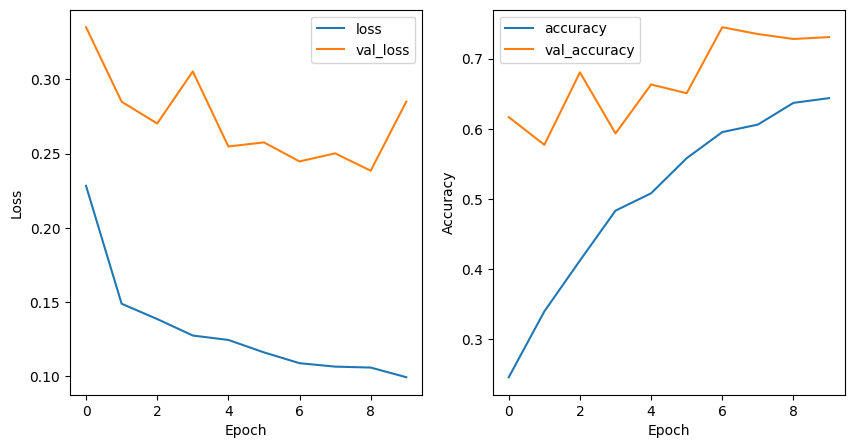

In [ ]:
metrics = history.history
plt.figure(figsize=(10, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [ ]:
res = model.predict(test_sig)

16/16 [==============================] - 7s 398ms/step


In [ ]:
print(np.round(res[58:70]*100, decimals=1))

[[11.9  0.1  1.3  4.6  0.   1.6]
 [ 1.7  0.4  0.   0.2  0.   0.1]
 [ 5.3 10.6  0.2  0.4  0.   4.6]
 [ 2.8  1.5  0.9  0.   7.5 37.3]
 [ 0.1  0.   0.   0.   0.   0. ]
 [13.1  3.8  0.2  1.5  0.1  2.7]
 [ 1.6  0.2  0.   0.1  0.   0.3]
 [ 7.5  0.   0.   7.6  0.   0.1]
 [ 2.9  0.   0.   0.   0.   0.1]
 [ 1.3 99.2  0.   0.   0.   0.4]
 [ 4.6  0.3  0.1  0.   0.1  2.7]
 [ 4.5  0.   0.   0.   0.   0.1]]


In [ ]:
print(test_res[58:70])

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
for i in range(0,res.shape[0]):
  for j in range(0,res.shape[1]):
    if res[i,j] > 0.5:
      res[i,j] = 1
    else:
      res[i,j] = 0

In [ ]:
print(res[58:70])

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
model.save_weights('model12_weights.h5')